# Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
from sklearn.model_selection import train_test_split
import pickle
import math

# Import assets

In [2]:
mat_content = sio.loadmat('assets/face.mat')
mat_content['X'][:, 0].shape

(2576,)

# Split into training and testing sets

In [37]:
def train_test_split_by_n(n, image_data, data_label, test_size = 0.2):
    print(image_data.shape[1])
#     for i in range()


image_data = mat_content['X'].T
print(image_data.shape)

data_label = mat_content['l'][0].T
print(data_label.shape)

train_test_split_by_n(10, )

X_train, X_test, y_train, y_test = train_test_split(image_data, data_label, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

train_image = X_train.T
train_label = y_train.T

test_image = X_test.T
test_label = y_test.T

(520, 2576)
(520,)
(416, 2576)
(104, 2576)
{1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52}


# Functions

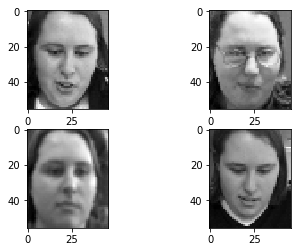

In [31]:
def select_image_by_label(l: int, label: list, image: list):
    col_indices = np.where(label == l)
    images = image[:, col_indices]
    return images.reshape(images.shape[0], images.shape[2])

def plot_face(face):
    plt.imshow(np.reshape(face,(46,56)).T, cmap = 'gist_gray')

def plot_all_faces(faces):
    n = faces.shape[1]
    if n == 0:
        print('No Image')
        return None
    n_of_rows = math.ceil(n / 2)
    for i in range(n):
        plt.subplot(n_of_rows, 2, i+1), plot_face(faces[:, i])

images = select_image_by_label(13, test_label, test_image)
plot_all_faces(images)

plt.show()

# Cache data with Pickle

In [5]:
PIK = 'pickle_cov.dat'

def write_to_pickle(data):
    with open(PIK, 'wb') as f:
        pickle.dump(data, f)

def read_from_pickle():
    with open(PIK, 'rb') as f:
        pickle.load(f)
    

# Use eigen values and eigen vectors 

[ 9.51205893e+05+0.j  5.31014401e+05+0.j  4.23692483e+05+0.j ...
 -3.16240659e-13+0.j  4.14434886e-14+0.j  1.38364860e-13+0.j]
[[-0.01413014+0.j -0.01763154+0.j -0.01222292+0.j ... -0.00023398+0.j
  -0.00060921+0.j  0.00115865+0.j]
 [-0.01591878+0.j -0.01746563+0.j -0.01392266+0.j ... -0.00036895+0.j
   0.00046211+0.j -0.00020116+0.j]
 [-0.01687053+0.j -0.01737134+0.j -0.01692739+0.j ...  0.00041447+0.j
   0.00053531+0.j  0.00017632+0.j]
 ...
 [ 0.00535277+0.j  0.04910349+0.j -0.00049366+0.j ... -0.00666641+0.j
   0.02841683+0.j -0.00815754+0.j]
 [ 0.0051616 +0.j  0.04891111+0.j -0.000233  +0.j ... -0.00541423+0.j
  -0.02780224+0.j  0.01248603+0.j]
 [ 0.00479607+0.j  0.05053079+0.j  0.00148538+0.j ... -0.00281485+0.j
  -0.01042901+0.j -0.0048476 +0.j]]


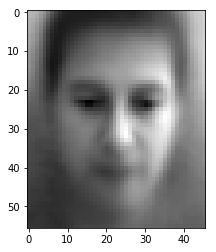

In [36]:
def compute_avg_face(face_list, axis=1):
    face_avg = np.mean(face_list, axis=axis)
    return face_avg

def compute_cov_face(face_list):
    return np.cov(face_list)

face_avg = compute_avg_face(train_image)
phi_face = train_image.T - face_avg

plot_face(face_avg)

s = compute_cov_face(phi_face.T) # Utilise broadcasting to deduct row by row

eigvals, eigvecs = np.linalg.eig(s) 

print(eigvals)
print(eigvecs)

# Plot a graph of Eigen values against number of columns

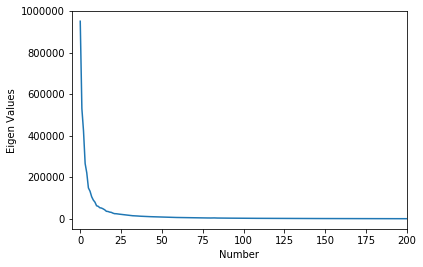

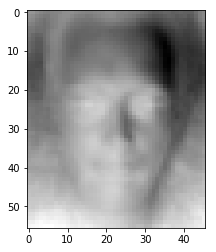

In [7]:
plt.plot(eigvals.real)

plt.xlabel('Number')
plt.ylabel('Eigen Values')
plt.xlim([-5, 200])
plt.show()

plot_face(((eigvecs[:, 0].real)))

(2576,)
(200,)


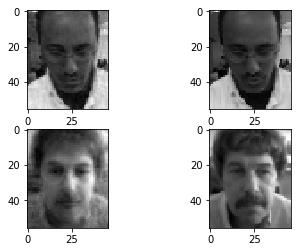

In [35]:
m_eigvecs = eigvecs[:, :200]
a = phi_face.dot(m_eigvecs)

x_n = face_avg + a.dot(m_eigvecs.T)
plt.subplot(221), plot_face(x_n[0, :].T.real)

plt.subplot(222), plot_face(train_image[:, 0])

a_test = m_eigvecs.T.dot(test_image[:, 3])
x_test = face_avg + a_test.dot(m_eigvecs.T)
print(x_test.shape)

plt.subplot(223), plot_face(x_test.T.real)
plt.subplot(224), plot_face(test_image[:, 3])

print(a_test.shape)
plt.show()

# Nearest Neighbor (NN) Classifier

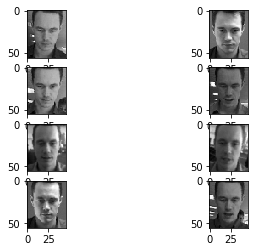

In [33]:
def nn_classifier(w_training, training_label, m_eigvecs, mean_image, face_image):
    # map test image onto eigenspace
    # normalize
    phi = face_image - mean_image
    # project on the eigenspace and represent the projection as w
    w = m_eigvecs.T.dot(phi)
    # calculate the distance 
    dist = np.linalg.norm(w_training - w, axis=1) 
    return training_label[np.argmin(dist)]

face_image = test_image[:, 11]
predicted_label = nn_classifier(a, train_label, m_eigvecs, face_avg, face_image)
images = select_image_by_label(predicted_label, train_label, train_image)
f = face_image.reshape(face_image.shape[0], 1)
all_images = np.hstack((images, f))
plot_all_faces(all_images)